<a href="https://colab.research.google.com/github/pradeepth67/Priv_proj_IN_1/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np

In [76]:
from google.colab import files
uploaded = files.upload()

Saving instagram_reach.csv to instagram_reach (2).csv


In [77]:
df = pd.read_csv('instagram_reach.csv')

In [78]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [80]:
df = df.drop(columns=['Unnamed: 0', 'S.No'])

In [81]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [82]:
df = df.dropna()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


In [84]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [85]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
print (STOPWORDS[:5])
porter = PorterStemmer()

['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
def preprocess(text, stopwords=STOPWORDS):
    """Conditional preprocessing on our text unique to our task."""
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r"\b(" + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub("", text)

    # Remove words in parenthesis
    text = re.sub(r"\([^)]*\)", "", text)

    # Spacing and filters
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)  # separate punctuation tied to words
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()

    return text

In [87]:
text = "Great week for the NYSE!"
preprocess(text=text)

'great week nyse'

In [88]:
df['Caption'] = df['Caption'].apply(preprocess)


In [89]:
df.head(5)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,datascientist mikequindazzi machinelearning ai...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,know going workresponsibly postpone date actua...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,alexander barinov 4 years cfo multinationals 1...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,ever missed call phone charging system notify ...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [90]:
df['Hashtags'] = df['Hashtags'].apply(preprocess)


In [91]:
df.head(5)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,datascientist mikequindazzi machinelearning ai...,1600,machinelearning ai dataanalytics datascienc da...,11 hours,139
1,drgorillapaints,know going workresponsibly postpone date actua...,880,deck mac macintosh sayhello apple stevejobs ai...,2 hours,23
2,aitrading_official,alexander barinov 4 years cfo multinationals 1...,255,whoiswho aitrading ai aitradingteam instateam ...,2 hours,25
3,opensourcedworkplace,sfad,340,iot cre workplace cdo bigdata technology tech ...,3 hours,49
4,crea.vision,ever missed call phone charging system notify ...,304,instamachinelearning instabigdata instamarketi...,3 hours,30


In [92]:
df['Caption'].head(5)

0    datascientist mikequindazzi machinelearning ai...
1    know going workresponsibly postpone date actua...
2    alexander barinov 4 years cfo multinationals 1...
3                                                 sfad
4    ever missed call phone charging system notify ...
Name: Caption, dtype: object

In [93]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

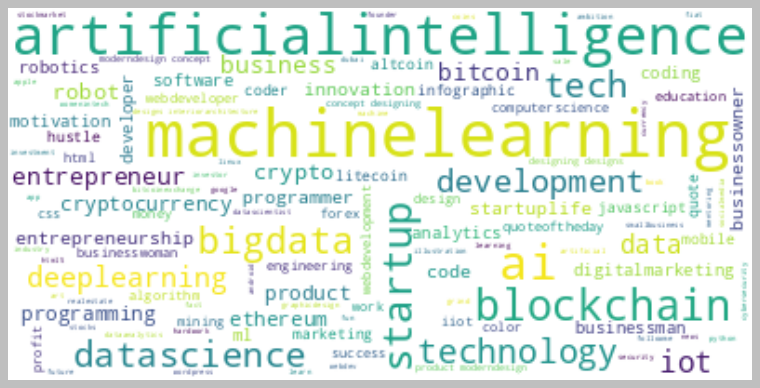

In [95]:
text = " ".join(i for i in df.Hashtags)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

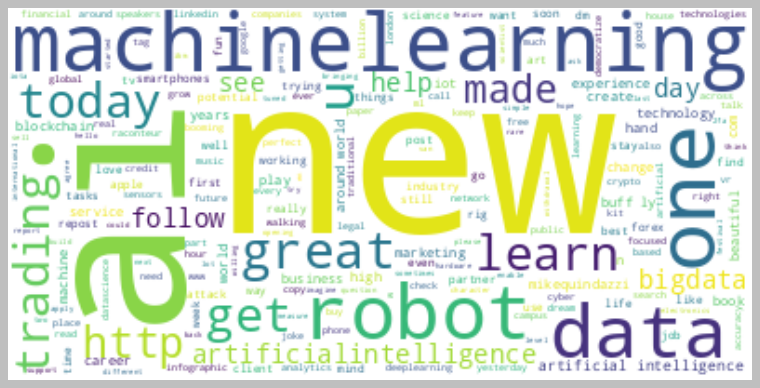

In [96]:
captions = " ".join(i for i in df.Caption)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(captions)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [97]:

df['Time since posted'] = df['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [98]:
df.rename(columns = {'Time since posted':'Time since posted in hours'}, inplace=True)

In [99]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted in hours,Likes
0,mikequindazzi,datascientist mikequindazzi machinelearning ai...,1600,machinelearning ai dataanalytics datascienc da...,11,139
1,drgorillapaints,know going workresponsibly postpone date actua...,880,deck mac macintosh sayhello apple stevejobs ai...,2,23
2,aitrading_official,alexander barinov 4 years cfo multinationals 1...,255,whoiswho aitrading ai aitradingteam instateam ...,2,25
3,opensourcedworkplace,sfad,340,iot cre workplace cdo bigdata technology tech ...,3,49
4,crea.vision,ever missed call phone charging system notify ...,304,instamachinelearning instabigdata instamarketi...,3,30


In [100]:
figure = px.scatter(data_frame = df, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

In [101]:
features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted in hours'

In [102]:
X = df[features]
y_likes = df[target_likes]
y_time_since_posted = df['Time since posted in hours']
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [103]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [104]:
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)

Mean Squared Error (Likes): 1834.941312808692


In [105]:
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

Mean Squared Error (Time Since Posted): 13.515582706225285
